# Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("tested.csv")
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# from above information we can see that we have some of the attributes(columns) with missing values.
### such columns having missing values-->"Age","cabin","Fare".
### so,we have to deal with the missing values but we can see here in "cabin" columns we have maximum data are missing so, first of all we are going to drop the cabin column as it does give us any insight for Exploratory data analysis and Model Prediction. Also some of the columns are not of our Use so also we will drop it.
### then we will look for deal with the missing values in Column "Age" and "Fare".


In [5]:
df.drop(['PassengerId','Name','Cabin','Embarked','Ticket'],axis=1,inplace=True)


In [6]:
df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
dtype: int64

In [7]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [8]:
# filling the null values in age column
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [9]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

<AxesSubplot:>

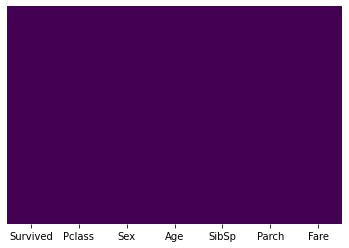

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [11]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

# Great! We are overcome with our missing values successfully 


# Exploratory data analysis 

<AxesSubplot:xlabel='Survived', ylabel='count'>

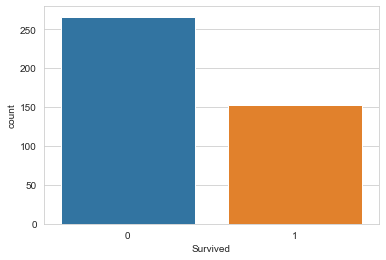

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)


<AxesSubplot:xlabel='Survived', ylabel='count'>

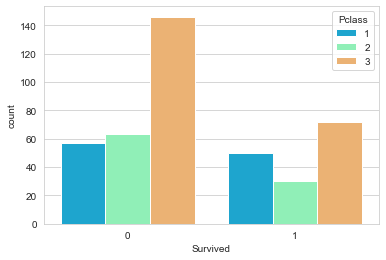

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')
 

<AxesSubplot:xlabel='SibSp', ylabel='count'>

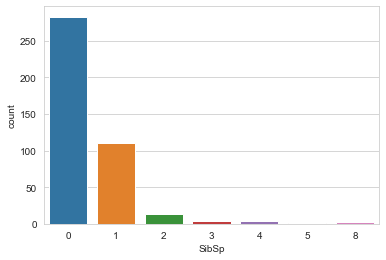

In [14]:
sns.countplot(x='SibSp',data=df)


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

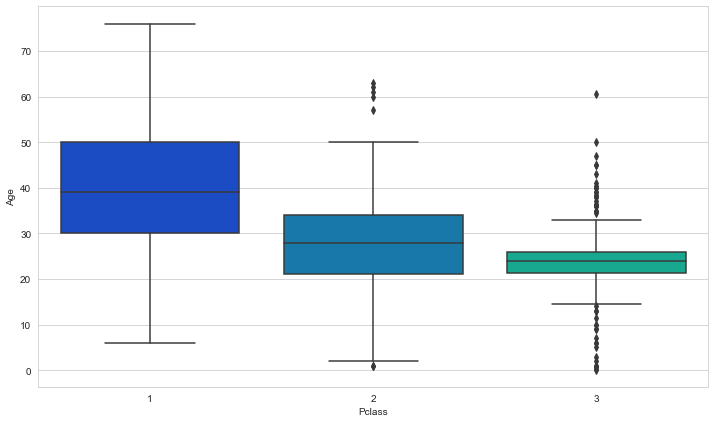

In [15]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')


In [16]:
from sklearn.preprocessing import LabelEncoder
Encode = LabelEncoder()
df.iloc[:,2] = Encode.fit_transform(df.iloc[:,2])
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,34.5,0,0,7.8292
1,1,3,0,47.0,1,0,7.0000
2,0,2,1,62.0,0,0,9.6875
3,0,3,1,27.0,0,0,8.6625
4,1,3,0,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,0,3,1,24.0,0,0,8.0500
414,1,1,0,39.0,0,0,108.9000
415,0,3,1,38.5,0,0,7.2500
416,0,3,1,24.0,0,0,8.0500


In [17]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Modelling


In [19]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()

In [20]:
model.fit(x_train,y_train)

BernoulliNB()

In [21]:
pred=model.predict(x_test)

In [22]:
pred

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,classification_report
classification_report(y_test,pred
                     )

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        53\n           1       1.00      1.00      1.00        31\n\n    accuracy                           1.00        84\n   macro avg       1.00      1.00      1.00        84\nweighted avg       1.00      1.00      1.00        84\n'

In [24]:
accuracy_score(y_test,pred)


1.0

In [25]:
precision_score(y_test,pred)

1.0

In [26]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [27]:
predictions = logmodel.predict(x_test)


In [28]:
accuracy=confusion_matrix(y_test,predictions)


In [29]:
accuracy_score(y_test,predictions)

1.0

In [30]:
## ML Model - 1 Implementation with hyperparameter optimization techniques
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score, roc_auc_score,accuracy_score 


param={'C':[0.01,0.1,1,10,100,110,120,130]}
grid=GridSearchCV(LogisticRegression(max_iter=500),param,n_jobs=-1)
grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 110, 120, 130]})

In [31]:
# Predict on the model
# Get the predicted classes
trainscore =  grid.score(x_train,y_train)
testscore =  grid.score(x_test,y_test)  

print("train score: {}".format(trainscore),'\n')
print("test score: {}".format(testscore),'\n')
y_predlogi =  grid.predict(x_test)
print(' f1 score: ',f1_score(y_test, y_predlogi,average='micro'),'\n')
print(confusion_matrix(y_test, y_predlogi))
print("precision score is",precision_score(y_test, y_predlogi))

train score: 1.0 

test score: 1.0 

 f1 score:  1.0 

[[53  0]
 [ 0 31]]
precision score is 1.0


In [32]:
from sklearn.svm import SVC
#applying support vector machine classifier
svcmodel = SVC(probability=True)  
svcmodel.fit(x_train, y_train)


SVC(probability=True)

In [33]:
trainscore =  svcmodel.score(x_train,y_train)
testscore =  svcmodel.score(x_test,y_test)  

print("train score: {}".format(trainscore),'\n')
print("test score: {} ".format(testscore),'\n')
y_predsvc =  svcmodel.predict(x_test)
print(' f1 score: ',f1_score(y_test, y_predsvc,average='micro'),'\n')
print(confusion_matrix(y_test, y_predsvc))
print("precision score is",precision_score(y_test, y_predsvc))

train score: 0.655688622754491 

test score: 0.6190476190476191  

 f1 score:  0.6190476190476191 

[[50  3]
 [29  2]]
precision score is 0.4


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [35]:
#Applying Decision Tree
DTmodel=  DecisionTreeClassifier(max_depth=6)  
DTmodel.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [36]:
trainscore =  DTmodel.score(x_train,y_train)
testscore =  DTmodel.score(x_test,y_test)
y_predDT =  DTmodel.predict(x_test)

print("train score: {}".format(trainscore),'\n')
print("test score: {} ".format(testscore),'\n')
print(' f1 score: ',f1_score(y_test, y_predDT,average='micro'),'\n')
print(confusion_matrix(y_test, y_predDT))

train score: 1.0 

test score: 1.0  

 f1 score:  1.0 

[[53  0]
 [ 0 31]]


In [37]:
print(' precision score: ',precision_score(y_test, y_predDT,average='micro'),'\n')
print(' recall score: ',recall_score(y_test, y_predDT,average='micro'),'\n')
print(classification_report(y_test, y_predDT))
print("precision score is",precision_score(y_test, y_predDT))

 precision score:  1.0 

 recall score:  1.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

precision score is 1.0


In [38]:
#applying random forest classifier
RFmodel=  RandomForestClassifier(criterion='entropy',max_depth=9) 
RFmodel.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9)

In [39]:
trainscore =  RFmodel.score(x_train,y_train)
testscore =  RFmodel.score(x_test,y_test)  
y_predRF =  RFmodel.predict(x_test)

print("train score: {}".format(trainscore),'\n')
print("test score: {} ".format(testscore),'\n')
print(' f1 score: ',f1_score(y_test, y_predRF,average='micro'),'\n')
print(confusion_matrix(y_test, y_predRF))
print("precision score is",precision_score(y_test, y_predRF))

train score: 1.0 

test score: 1.0  

 f1 score:  1.0 

[[53  0]
 [ 0 31]]
precision score is 1.0


In [ ]:
Thank you!